# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**Hint:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
data.head(n=100)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [3]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income'] == ">50K"])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income'] == "<=50K"])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = 100.*n_greater_50k/n_records

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

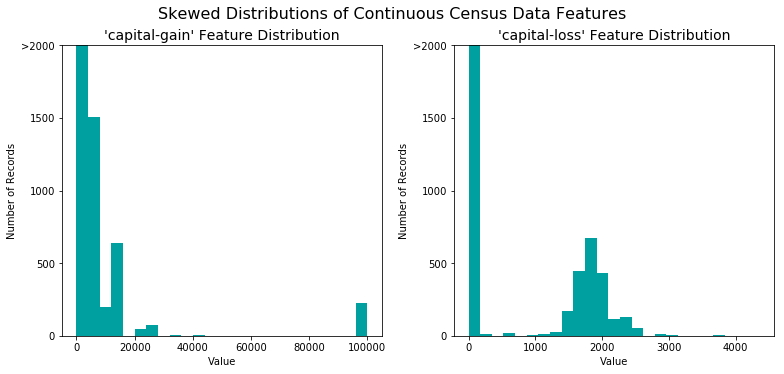

In [4]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

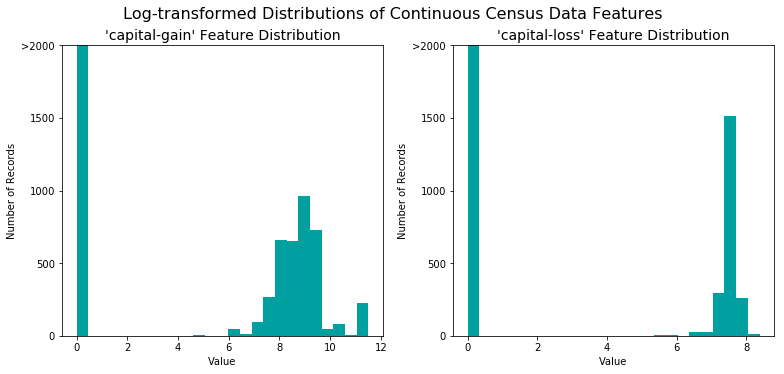

In [5]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [6]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [7]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
features = pd.get_dummies(features_raw)

# TODO: Encode the 'income_raw' data to numerical values
income = pd.get_dummies(income_raw)['>50K']

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
print encoded

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

In [8]:
#print features_raw
print pd.get_dummies(features_raw)

            age  education-num  capital-gain  capital-loss  hours-per-week  \
0      0.301370       0.800000      0.021740      0.000000        0.397959   
1      0.452055       0.800000      0.000000      0.000000        0.122449   
2      0.287671       0.533333      0.000000      0.000000        0.397959   
3      0.493151       0.400000      0.000000      0.000000        0.397959   
4      0.150685       0.800000      0.000000      0.000000        0.397959   
5      0.273973       0.866667      0.000000      0.000000        0.397959   
6      0.438356       0.266667      0.000000      0.000000        0.153061   
7      0.479452       0.533333      0.000000      0.000000        0.448980   
8      0.191781       0.866667      0.140841      0.000000        0.500000   
9      0.342466       0.800000      0.051781      0.000000        0.397959   
10     0.273973       0.600000      0.000000      0.000000        0.806122   
11     0.178082       0.800000      0.000000      0.000000      

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [9]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


/home/pepe/Apps/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 

### Question 1 - Naive Predictor Performace
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [10]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        # Calculate and return the accuracy as a percent
        return (truth == pred).mean()
    
    else:
        raise "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
always_greater_50k = np.ones(len(income), dtype=int)
print accuracy_score(income.values, always_greater_50k)


0.247843969749


In [11]:
# TODO: Calculate accuracy
accuracy = accuracy_score(income.values, always_greater_50k)

# Recall: True Positive / (True Positive + False Negative). Out of all the items that are truly positive, how many were correctly classified as positive. Or simply, how many positive items were 'recalled' from the dataset.
# Precision: True Positive / (True Positive + False Positive). Out of all the items labeled as positive, how many truly belong to the positive class.


# TODO: Calculate F-score using the formula above for beta = 0.5
def true_positives(ground_truth, predictions):
    '''true in both data sets'''
    counts = (ground_truth & predictions).value_counts()
    if True in counts:
        try:
            return float(counts[True])
        except KeyError:
            return float(counts[1])
    else:  # no True or 1 in dict
        return 0.0


def true_negatives(ground_truth, predictions):
    counts = ((ground_truth == False) & (predictions == False)).value_counts()
    if True in counts:
        try:
            return float(counts[True])
        except KeyError:
            return float(counts[1])
    else:  # no True or 1 in dict
        return 0.0
    
def false_positives(ground_truth, predictions):
    counts = ((ground_truth == False) & (predictions == True)).value_counts()
    if True in counts:
        try:
            return float(counts[True])
        except KeyError:
            return float(counts[1])
    else:  # no True or 1 in dict
        return 0.0

def false_negatives(ground_truth, predictions):
    counts = ((ground_truth == True) & (predictions == False)).value_counts()
    if True in counts:
        try:
            return float(counts[True])
        except KeyError:
            return float(counts[1])
    else:  # no True or 1 in dict
        return 0.0

def fscorer(ground_truth, predictions, beta=0.5):
    n_true_positive = true_positives(ground_truth, predictions)
    n_false_positive = false_positives(ground_truth, predictions)
    n_false_negative = false_negatives(ground_truth, predictions)
    
    try:
        precision = n_true_positive / (n_true_positive + n_false_positive)
    except ZeroDivisionError:
        print "Warning! Divided by zero! trupos", n_true_positive, " falseneg", n_false_negative
        precision = 0.0
    recall = n_true_positive / (n_true_positive + n_false_negative)
    
    numerator = precision * recall
    denom = (beta**2 * precision) + recall
    try:
        fscore = (1+beta**2) * numerator / denom
    except ZeroDivisionError:
        print "precision", precision, " recall", recall
        fscore = 0.0
    
    return fscore

fscore = fscorer(income, always_greater_50k)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


**Answer**: The naive model had an accuracy score of 0.2478 and an F-score of 0.2917

###  Supervised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
- *What are the strengths of the model; when does it perform well?*
- *What are the weaknesses of the model; when does it perform poorly?*
- *What makes this model a good candidate for the problem, given what you know about the data?*

**Answer: ** 


# Decision Trees
Sources: [ref3](https://www.quora.com/What-are-the-advantages-of-different-classification-algorithms) [ref4](https://sebastianraschka.com/faq/docs/best-ml-algo.html)
## Application 
Based on a Google scholar search, I found DTs are for classification and regression in insurance and medical diagnosis.

## Strengths
From ([ref2](http://scikit-learn.org/stable/modules/tree.html#decision-trees)):
- they are simple to interpret and visualize.
- it requires relateively little data pre-processing.
- training and predictions are relatively fast algorithm running at O log(n) time

## Weaknesses
From ([ref2](http://scikit-learn.org/stable/modules/tree.html#decision-trees)) and ([ref1](http://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)):
- Decision trees tend to overfit when there are a large number of features. 
- The sample size needs to double for each level you add to your tree. 
- DTs are biased towards dominant classes in the dataset, so the data either has to be sampled such that each class has a uniform representation or the dataset needs to be preprocessed.
- they are not robust: small changes in the input result in big changes in the model output
- there is no guarantee that the sklearn DT algorithm will find the global optimum model. This can be worked around by using an ensemble of DTs.
- they are not very 'expressive', so they have a hard time explaining complex relationships (e.g. XOR)

## Good candidate for CharityML?
It is a non-linear classifier that has had success in many problem domains, so it might be useful in ours. It's also always  nice to have a "white box" model which can be examined.

# KNeighbors

## Application
Finding items in a dataset that are "close" to one another in some feature space. This could be useful for a recommender system, such a product recommendation system.

## Strengths
- can be used for continuous or descrete training labels.
- Will only consider local data for fitting model, so it can result in a very flexible model that makes very different predictions at various parts of the solution space.

## Weaknesses
They take a relatively long time to make predictions, since you first have to find the K neighbors. They are pretty slow to train as well.

## Good candidate?
There are enough samples in the data to be confident that each sample will have several neighbors, even in the high dimensional space. 

# Support Vector Machines
## Application 
According to my Google search, I found a lot of people using it for financial forecasting and for predicting binary labels in healthcare (sick or not sick).

## Strengths
- They take a fairly short time to create predictions.
- They work well in complicated domains (high dimensionality) where there is a clear marginal separation

## Weaknesses
- They take a fairly long time to train. They do not work well with large datasets because the training time increases as the cube of the size of the dataset.
- They also do not work well where there is a lot of overlap between the classes. In these cases, a naive bayes works better.

## Good candidate?
According to the [sklearn decision tree](http://scikit-learn.org/stable/tutorial/machine_learning_map/), SVMs are ideal for our dataset. In particular, for predicting labeled categorical data with a len(dataset) < 100k, it suggests SVM using a linear kernel. Our dataset is only around 40k large, which I don't think would be a problem with the training time. I am not sure if there is a clear separation in the data a priori because of the high dimensionality of our data, so I think it is worth testing.

Given that it is good at predicting binary labels by fitting a hyperplane, I would also guess this is well-suited for CharityML.


### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [12]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    print "learner {} default params = {}".format(learner.__class__.__name__, learner.get_params())
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = learner.score(X_train[:300], y_train[:300]) 
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = learner.score(X_test, y_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fscorer(y_train[:300], predictions_train[:300])
    if results['f_train'] < 1e-4:
        print "WARNING: {} has train f score of {}".format(learner.__class__.__name__, results['f_train'])
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fscorer(y_test, predictions_test)
    if results['f_train'] < 1e-4:
        print "WARNING: {} has test f score of {}".format(learner.__class__.__name__, results['f_test'])
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

learner DecisionTreeClassifier default params = {'presort': False, 'splitter': 'best', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': 1, 'min_impurity_split': 1e-07, 'max_features': None, 'max_depth': None, 'class_weight': None}
DecisionTreeClassifier trained on 361 samples.
learner DecisionTreeClassifier default params = {'presort': False, 'splitter': 'best', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': 1, 'min_impurity_split': 1e-07, 'max_features': None, 'max_depth': None, 'class_weight': None}
DecisionTreeClassifier trained on 3617 samples.
learner DecisionTreeClassifier default params = {'presort': False, 'splitter': 'best', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': 1, 'min_impurity_split': 1e-07,

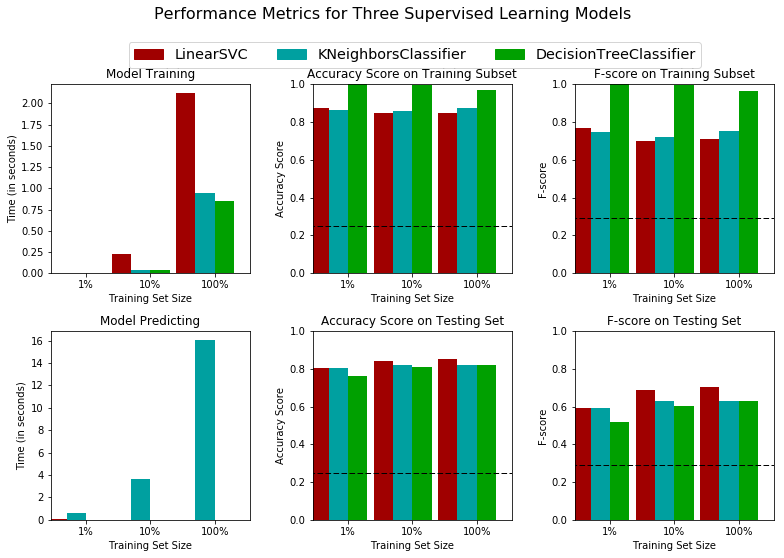

In [14]:
# TODO: Import the three supervised learning models from sklearn
from sklearn import svm, tree
from sklearn.neighbors import KNeighborsClassifier

# TODO: Initialize the three models
clf_A = tree.DecisionTreeClassifier(random_state=1)
clf_B = KNeighborsClassifier(n_jobs=-1)
clf_C = svm.LinearSVC(random_state=1)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = float(len(X_train))
samples_1 = int(samples_100*.01)
samples_10 = int(samples_100*.1)
samples_100 = int(samples_100)


# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model
*Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.*  
**Hint:** Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

**Answer: ** For chosing a model, we want to pick the one with the best test scores which is a proxy for generalized performance. LinearSVC has the best test scores of all the models for both accuracy and f-score metrics. Additionally, the testing performance is very close to the training performance, indicating it is not overfit. It has the longest training time, but the training time is still very low. The predicting time is negligible. Finally, according to the decision tree flowchart on sklearn (http://scikit-learn.org/stable/tutorial/machine_learning_map/), it recommends LinearSVC for this dataset type and size.

### Question 4 - Describing the Model in Layman's Terms
*In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: ** All individuals are represented as a data point with coordinates that arrange them in a space according to their properties (age, education level, etc.). My SVM model tries to separate the points into two groups: high or low income. It does this by generating a line that divides the two groups. It then moves the line around until it finds the best line. The best line is the line that maximizes the separation between the two groups. Specifically, for each line it tests, it measures the squared distance between the line and the closest point frpm either group, and then adds these squared distances. The line with the highest total squared distance is the line with the maximum separation between the two groups.

If the data is in a 3D space, a plane is chosen to divide the 3D space into two volumes which each volume corresponding to one of the classes. In our case, our dataset more than 3 feature axes, so they are embedded in a high dimensional space. Our SVM separates the space using a high-dimensional plane, or a hyperplane.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [16]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import svm


# TODO: Initialize the classifier
clf = svm.LinearSVC(random_state=1, dual=False, class_weight=None)

# TODO: Create the parameters list you wish to tune
parameters = {'C':np.concatenate((np.linspace(1e-3,1,4), np.exp(np.linspace(1e-3, 7, 15))))}
              #"loss" : ["hinge", "squared_hinge"], "penalty": ["l1", "l2"]}
              #  After running multiple times, squared_hinge and l2 are clearly the way to go

# TODO: Make an fbeta_score scoring object
fbeta_score = make_scorer(fscorer, {'beta': 0.5})

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=fbeta_score, verbose=3, n_jobs=-1, cv=20, error_score=0.0)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fscorer(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fscorer(y_test, best_predictions, beta = 0.5))

Fitting 20 folds for each of 19 candidates, totalling 380 fits
[CV] C=0.001 .........................................................
[CV] C=0.001 .........................................................
[CV] C=0.001 .........................................................
[CV] C=0.001 .........................................................
[CV] .......................... C=0.001, score=0.676385, total=   0.8s
[CV] C=0.001 .........................................................
[CV] .......................... C=0.001, score=0.669925, total=   0.9s
[CV] C=0.001 .........................................................
[CV] .......................... C=0.001, score=0.637088, total=   0.9s
[CV] C=0.001 .........................................................
[CV] .......................... C=0.001, score=0.676422, total=   1.2s
[CV] C=0.001 .........................................................
[CV] .......................... C=0.001, score=0.667434, total=   0.6s
[CV] C=0.001 .

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.5s


[CV] .......................... C=0.334, score=0.717768, total=   1.3s
[CV] C=0.334 .........................................................
[CV] .......................... C=0.334, score=0.709220, total=   1.2s
[CV] C=0.334 .........................................................
[CV] .......................... C=0.334, score=0.716855, total=   1.1s
[CV] C=0.334 .........................................................
[CV] .......................... C=0.334, score=0.725888, total=   1.3s
[CV] C=0.334 .........................................................
[CV] .......................... C=0.334, score=0.685265, total=   1.0s
[CV] C=0.334 .........................................................
[CV] .......................... C=0.334, score=0.686120, total=   1.3s
[CV] C=0.334 .........................................................
[CV] .......................... C=0.334, score=0.715401, total=   1.0s
[CV] C=0.334 .........................................................
[CV] .

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   45.2s


[CV] .................. C=1.65025293719, score=0.713514, total=   1.6s
[CV] C=2.72061278315 .................................................
[CV] .................. C=2.72061278315, score=0.703491, total=   1.4s
[CV] C=2.72061278315 .................................................
[CV] .................. C=2.72061278315, score=0.700958, total=   1.4s
[CV] C=2.72061278315 .................................................
[CV] .................. C=2.72061278315, score=0.692226, total=   1.4s
[CV] C=2.72061278315 .................................................
[CV] .................. C=2.72061278315, score=0.720892, total=   1.5s
[CV] .................. C=2.72061278315, score=0.712841, total=   1.4s
[CV] C=2.72061278315 .................................................
[CV] C=2.72061278315 .................................................
[CV] .................. C=2.72061278315, score=0.728426, total=   1.3s
[CV] C=2.72061278315 .................................................
[CV] .

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.9min


[CV] .................. C=148.455568921, score=0.704961, total=   1.9s
[CV] C=148.455568921 .................................................
[CV] .................. C=148.455568921, score=0.701660, total=   1.9s
[CV] C=148.455568921 .................................................
[CV] .................. C=148.455568921, score=0.698437, total=   1.9s
[CV] .................. C=148.455568921, score=0.693411, total=   1.8s
[CV] C=148.455568921 .................................................
[CV] C=148.455568921 .................................................
[CV] .................. C=148.455568921, score=0.723613, total=   1.4s
[CV] C=148.455568921 .................................................
[CV] .................. C=148.455568921, score=0.712841, total=   1.4s
[CV] C=148.455568921 .................................................
[CV] .................. C=148.455568921, score=0.729483, total=   1.4s
[CV] C=148.455568921 .................................................
[CV] .

[Parallel(n_jobs=-1)]: Done 380 out of 380 | elapsed:  2.7min finished


Unoptimized model
------
Accuracy score on testing data: 0.8507
F-score on testing data: 0.7054

Optimized Model
------
Final accuracy score on the testing data: 0.8506
Final F-score on the testing data: 0.7051


In [17]:
print "best params found: ", grid_fit.best_params_, "with a score of ", grid_fit.best_score_
#from IPython.display import display
#display(pd.DataFrame(grid_obj.grid_scores_))

best params found:  {'C': 2.7206127831498801} with a score of  0.707368490268


### Question 5 - Final Model Evaluation
_What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  
**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |      0.2478         |     0.8507        |   0.8506        |
| F-score        |      0.2917         |     0.7054        |   0.7051        |


**Answer: ** The optimized model has an accuracy of 0.8506 and an f-score of 0.7051. Compared to the unoptimized model, this is nearly the same. The optimized model, however, is apparently very slightly worse than the unoptimized version by a fraction of 1 percent. This reason why gridsearch recommended a model that is at first glance slightly worse than the unoptimized is that the numbers generated for the tables above are calculated using the testing set, while the gridsearch was optimized over the training set. To mitigate gridsearch overfitting to the training data, I set gridsearch to do a 20-fold cross-validation.

Compared to the naive model, the optimized model is much more accurate and has a much higher f-score. 

In general, this is a little dissapointing, as I was hoping for a model with >90% accuracy.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?_

**Answer:**

1) capital-gain. I expect anybody who has enough disposable income to be flipping a substantial amount of capital assets (stocks, real estate, etc.) to make make >50k/year.

2) occupation. Certain occupations have a mean pay which is >50k/year.

3) hours-per-week. People who work more get paid more. I would excpect people wwith low hours to make lower wages.

4) education-num. Higher education levels give access to higher paying jobs.

5) sex. In the U.S. there is a 6% [pay gap](https://en.wikipedia.org/wiki/Gender_pay_gap_in_the_United_States) between men and women, all other factors being

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

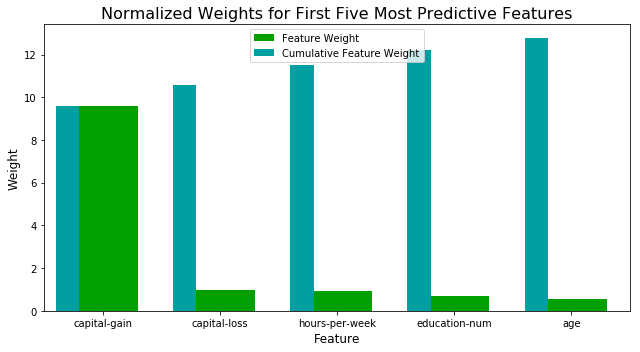

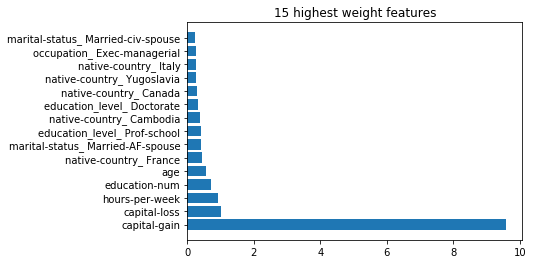

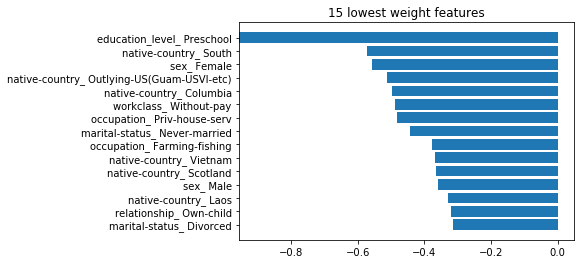

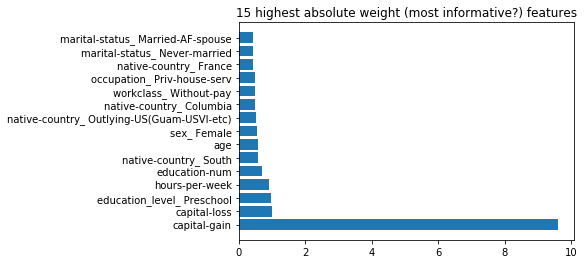

sum abs coeff 33.0140566692


In [18]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn import svm
import matplotlib.pyplot as plt
from scipy.stats import rankdata

# TODO: Train the supervised model on the training set 
model = svm.LinearSVC(random_state=1)
model = model.fit(X_train, y_train)

# TODO: Extract the feature importances
importances = model.coef_[0]

# Plot
vs.feature_plot(importances, X_train, y_train)

# plot more features
def feature_importances(weights_unsorted, names_unsorted, n=15):
    weights_rank = rankdata(weights_unsorted)
    top_rank = np.max(weights_rank)
    weights_rank = [abs(int(i-top_rank)) for i in weights_rank] # reverse rank order
    indices_in_order = np.argsort(weights_rank)
    
    # higher weight first
    names = names_unsorted.values[indices_in_order]
    weights = weights_unsorted[indices_in_order]
    
    plt.barh(range(len(weights[:n])), weights[:n], align='center')
    plt.yticks(range(len(names[:n])), names[:n])
    plt.title('{} highest weight features'.format(n))
    plt.show()
    
    plt.barh(range(len(weights[-n:])), weights[-n:], align='center')
    plt.yticks(range(len(names[-n:])), names[-n:])
    plt.title('{} lowest weight features'.format(n))
    plt.show()
    
    # absolute vals of weights
    abs_weights_unsorted = np.absolute(weights_unsorted)
    abs_weights_rank = rankdata(np.absolute(abs_weights_unsorted))
    abs_weights_rank = [abs(int(i-top_rank)) for i in abs_weights_rank] # reverse rank order
    indices_in_order = np.argsort(abs_weights_rank)
    abs_names = names_unsorted.values[indices_in_order]
    abs_weights = abs_weights_unsorted[indices_in_order]
    
    plt.barh(range(len(abs_weights[:n])), abs_weights[:n], align='center')
    plt.yticks(range(len(abs_names[:n])), abs_names[:n])
    plt.title('{} highest absolute weight (most informative?) features'.format(n))
    plt.show()
    
    

feature_names = X_train.columns
feature_importances(model.coef_[0], feature_names)

print "sum abs coeff", sum(abs(model.coef_[0]))

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

**Answer:**
I was more or less correct about education-num, hours-per-week, and capital-gains, as they are have the highest coefficients in the model and are thus capture the most variance in the underlying data (at least in the positive direction-- see below). As expected, capital gains was a strong predictor of income, although I did not expect it to be the most important by such a large margin. Female gender was not on the top because it has a negative coefficient. Unexpectedly, people who lose a lot of capital (capital-loss) tend to have very high wages, which maybe means that people with a lot of money tend to lose a significant amount of money. Age was a strong predictor, which makes sense, because senior experts should be expected to make higher wages than junior employees.

vs.feature_plot() ranks importance based on how big the coefficient for that feature is. However, very low coefficient values are also very important for giving the hyperplane the correct shape. In other words, the absolute value of the coefficient encodes how informative (in a Shannon entropy sense) the feature value is. Ranking based on absolute value of coefficients, we see that pre-school education is a very strongly suggestive feature. I also am vindicated in my prediction that women would have a substantial decrease in wages, with the norm of that coefficient being nearly as large as the age coefficient.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [19]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fscorer(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fscorer(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8506
F-score on testing data: 0.7051

Final Model trained on reduced data
------
Accuracy on testing data: 0.8093
F-score on testing data: 0.5972


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

**Answer:**
Accuracy is reduced by 4%, F-score is reduced by 11%. I think these are relatively minor performance reductions given that we just eliminated about 95% of the features. If hypothetically training time was a factor, I would definetly reduce the number of features to maybe the top 15, re-tune the model, and fit the model with the reduced data.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.